# Hamza Waheed
### Quiz 01

### 1. Data Loading using Seaborn

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the "iris" dataset.

In [161]:
data = sns.load_dataset('iris')

Display the first 10 rows of the dataset.

In [162]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Show summary statistics for numerical columns.


In [163]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Check for missing values in each column.

In [164]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There is no missing value

List all unique species in the dataset.

In [165]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Check data types of each column.

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 2. Data Preprocessing
 Check for duplicate entries and remove them if any exist.


In [167]:
data.duplicated().sum()

1

there is one duplicate value. I gonna remove in next cell

In [168]:
data = data.drop_duplicates()
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Normalize 'sepal_length' by subtracting its mean and dividing by its standard
deviation.


In [169]:
data['sepal_length'] = (data['sepal_length'] - data['sepal_length'].mean()) / data['sepal_length'].std()
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.895015,3.5,1.4,0.2,setosa
1,-1.135732,3.0,1.4,0.2,setosa
2,-1.376449,3.2,1.3,0.2,setosa
3,-1.496807,3.1,1.5,0.2,setosa
4,-1.015373,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,1.030721,3.0,5.2,2.3,virginica
146,0.549287,2.5,5.0,1.9,virginica
147,0.790004,3.0,5.2,2.0,virginica
148,0.428929,3.4,5.4,2.3,virginica


Convert species names into numerical format (using label encoding).

In [170]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['species'] = encoder.fit_transform(data['species'])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.895015,3.5,1.4,0.2,0
1,-1.135732,3.0,1.4,0.2,0
2,-1.376449,3.2,1.3,0.2,0
3,-1.496807,3.1,1.5,0.2,0
4,-1.015373,3.6,1.4,0.2,0
...,...,...,...,...,...
145,1.030721,3.0,5.2,2.3,2
146,0.549287,2.5,5.0,1.9,2
147,0.790004,3.0,5.2,2.0,2
148,0.428929,3.4,5.4,2.3,2


Create a new column indicating whether sepal length is above average across all
species.

In [171]:
nea = pd.DataFrame(data)
nea['new_col'] = data['sepal_length'] .sum() / len(data['sepal_length'])
nea

,sepal_length,sepal_width,petal_length,petal_width,species,new_col
0,-0.895015,3.5,1.4,0.2,0,1.001436e-15
1,-1.135732,3.0,1.4,0.2,0,1.001436e-15
2,-1.376449,3.2,1.3,0.2,0,1.001436e-15
3,-1.496807,3.1,1.5,0.2,0,1.001436e-15
4,-1.015373,3.6,1.4,0.2,0,1.001436e-15
...,...,...,...,...,...,...
145,1.030721,3.0,5.2,2.3,2,1.001436e-15
146,0.549287,2.5,5.0,1.9,2,1.001436e-15
147,0.790004,3.0,5.2,2.0,2,1.001436e-15
148,0.428929,3.4,5.4,2.3,2,1.001436e-15


Filter out rows where petal width is less than 0 (if applicable).


In [172]:
(data['petal_width'] < 0).sum()

0

ther is no value which is less then 0

Rename columns to more descriptive names.

In [174]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.895015,3.5,1.4,0.2,0
1,-1.135732,3.0,1.4,0.2,0
2,-1.376449,3.2,1.3,0.2,0
3,-1.496807,3.1,1.5,0.2,0
4,-1.015373,3.6,1.4,0.2,0
...,...,...,...,...,...
145,1.030721,3.0,5.2,2.3,2
146,0.549287,2.5,5.0,1.9,2
147,0.790004,3.0,5.2,2.0,2
148,0.428929,3.4,5.4,2.3,2


### 3 Use of NumPy on the Dataset

- Calculate the mean petal length for all species using NumPy functions.


In [176]:
np.mean(data['petal_length'])

3.7489932885906043

- Find the maximum sepal width among all samples using NumPy.


In [177]:
max_index = np.argmax(data['sepal_width'])
data['sepal_width'][max_index]

4.4

- Identify how many samples have petal length greater than 5 cm using NumPy
functions.


In [178]:
data['sepal_width']

np.greater(data['sepal_width'], 5).sum()

0

- Compute median sepal length across all species using NumPy.


In [179]:
np.median(data['sepal_length'])

-0.05250538040829554

- Create an array containing petal widths and calculate its standard deviation.


In [180]:
newarr = np.array(data['petal_width'])
np.std(newarr)

0.7600587433054616


- Count how many samples belong to species "setosa" using NumPy.

AS we know that
 - setosa = 0
 - versicolor = 1
 - virginica = 2

In [181]:
values = data['species'].values
count = 0
for i in values:
    if i == 0:
        count += 1

print("samples belong to species setosa: ", count)

samples belong to species setosa:  50


### 4: Use of Pandas on the Dataset
 Group samples by species and calculate average sepal width for each species.


In [ ]:
group = data['species'].value_counts()
data.loc[group]


,sepal_length,sepal_width,petal_length,petal_width,species
50,1.391796,3.2,4.7,1.4,1
50,1.391796,3.2,4.7,1.4,1
49,-1.015373,3.3,1.4,0.2,0


 Count how many samples are there for each species using Pandas functions.


In [183]:
data['species'].value_counts()

species
0    50
1    50
2    49
Name: count, dtype: int64

 Find which species has the highest average petal length using groupby().


In [ ]:
# data['species'].groupby(by=data['petal_length'].value_counts(), level=data['sepal_length'])

ValueError: multiple levels only valid with MultiIndex

Filter out samples where sepal length is greater than 6 cm and display them.

there is 0 values grater then 6

In [243]:
les_then_6 = (data['sepal_length'] > 6)

les_then_6.sum()

0

 Create a new DataFrame containing only samples with petal length greater than
1 cm.

In [260]:
new_df = pd.DataFrame(data['petal_length']>1)
new_df

,petal_length
0,True
1,True
2,True
3,True
4,True
...,...
145,True
146,True
147,True
148,True


### 5: Use of Matplotlib and Seaborn on the Dataset
 Create a pairplot to visualize relationships between features in different species
using Seaborn.


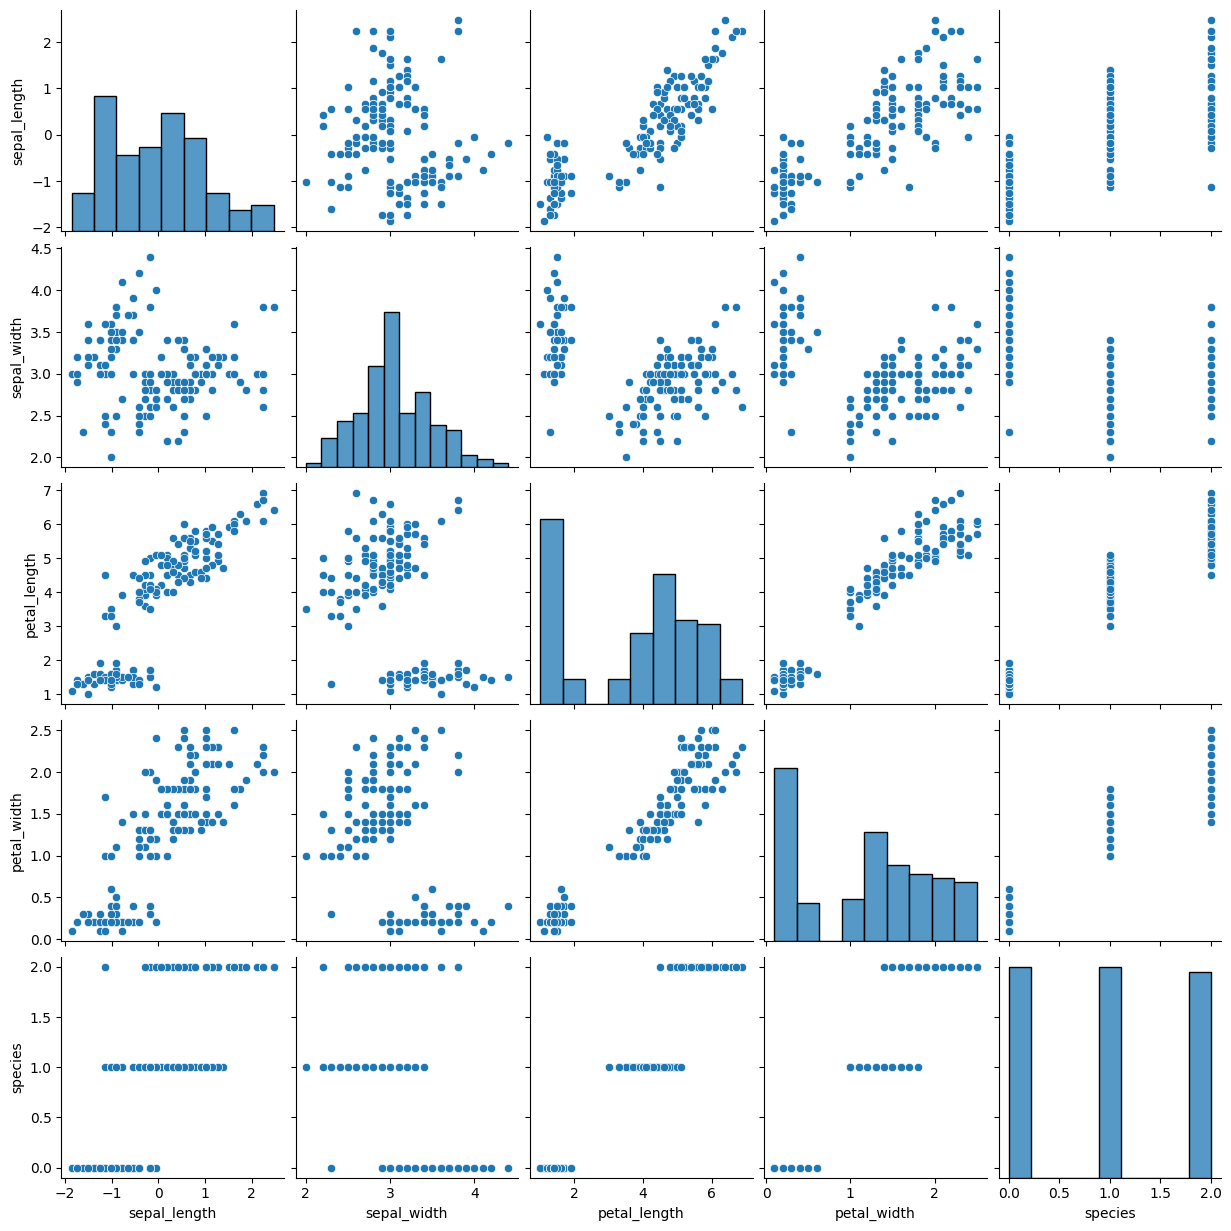

In [216]:
sns.pairplot(data )
plt.show()

Generate a histogram showing distribution of sepal lengths using Matplotlib.


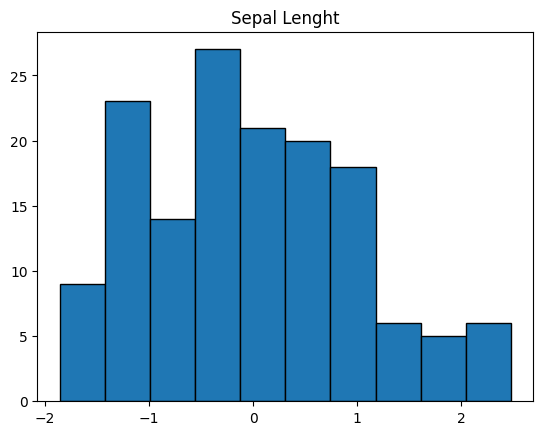

In [219]:
plt.hist(data['sepal_length'], edgecolor='black')
plt.title("Sepal Lenght")
plt.show()

 Create a violin plot comparing petal lengths across different species using
Seaborn.


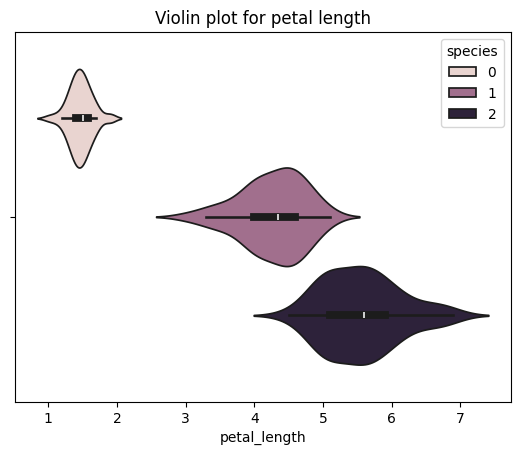

In [223]:
sns.violinplot(data, x='petal_length', hue='species')
plt.title("Violin plot for petal length")
plt.show()

 Plot a scatter plot showing sepal length versus sepal width, colored by species
type.


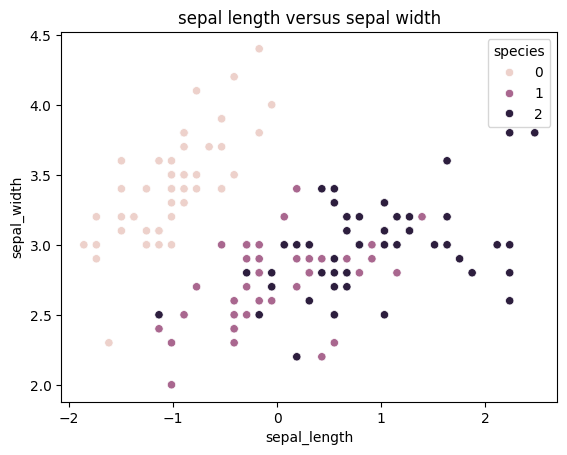

In [227]:
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species')
plt.title("sepal length versus sepal width")
plt.show()

 Visualize petal length distribution with a boxplot categorized by species using
Seaborn.


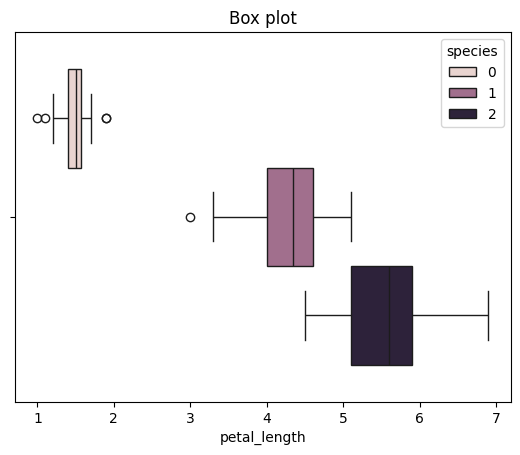

In [232]:
sns.boxplot(data=data, x='petal_length', hue='species')
plt.title("Box plot")
plt.show()

 Create a heatmap showing correlations between numerical features in iris data.

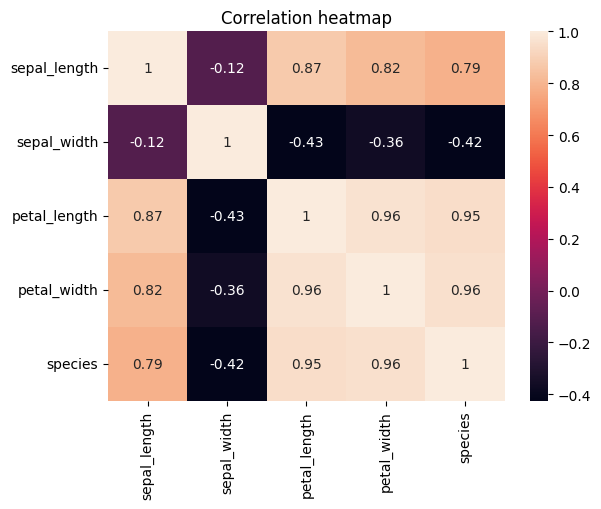

In [236]:
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True)
plt.title("Correlation heatmap")
plt.show()